# Exercise 6
### Diogo Gomes

### Exercise 1.
Using the EFIplus_medit.zip dataset, test if the frequency of sites with presence and absence of Salmo trutta fario (Brown Trout) are independent from the country. Please state which is/are the null hypothesis of your test(s). You may try to produce an alluvial plot.

H0: The presence or absence of Salmo trutta fario is independent of the country.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

In [4]:
contingency = pd.crosstab(df['Country'], df['Salmo trutta fario'])
print(contingency)

Salmo trutta fario     0     1
Country                       
France                13    59
Italy                109    76
Portugal             615   252
Spain               1239  2648


Chi2 statistic: 496.37
p-value: 0.0000
Reject the null hypothesis: Presence/absence is dependent on country.


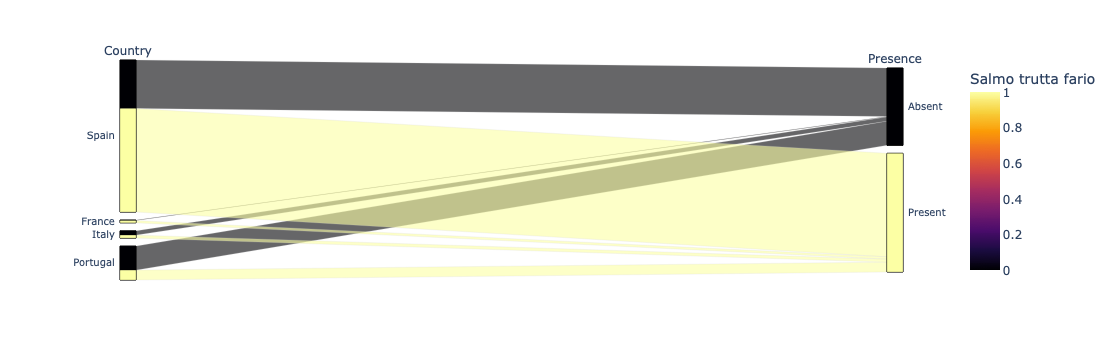

In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi2 statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")

if p < 0.05:
    print("Reject the null hypothesis: Presence/absence is dependent on country.")
else:
    print("Fail to reject the null hypothesis: No evidence of dependence.")

import plotly.express as px

df['Presence'] = df['Salmo trutta fario'].map({0: 'Absent', 1: 'Present'})

fig = px.parallel_categories(df, dimensions=['Country', 'Presence'],
                             color_continuous_scale=px.colors.sequential.Inferno,
                             color=df['Salmo trutta fario'])
fig.show()

### Exercise 2.
Run the non-parametric equivalent of the test you used in exercise 5.3 and compare with the ANOVA test (5.2: Test whether there are differences in the mean elevation in the upstream catchment (Elevation_mean_catch) among the eight most sampled catchments. For which pairs of catchments are these diferences significant? Please state which is/are the null hypothesis of your test(s)).

ANOVA H0: All catchments have the same mean elevation.

Kruskal-wallis H0: All catchments come from the same distribution

In [11]:
top_catchments = df['Catchment_name'].value_counts().head(8).index
df_top = df[df['Catchment_name'].isin(top_catchments)]

import scipy.stats as stats

groups = [group['Elevation_mean_catch'].dropna().values for name, group in df_top.groupby('Catchment_name')]
f_stat, p_value = stats.f_oneway(*groups)

print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_value:.4f}")

h_stat, p_kw = stats.kruskal(*groups)

print(f"Kruskal-Wallis H-statistic: {h_stat:.3f}, p-value: {p_kw:.4f}")

ANOVA F-statistic: 227.954, p-value: 0.0000
Kruskal-Wallis H-statistic: 1335.373, p-value: 0.0000


### Exercise 3
Using the winequality_red.csv file in the examples folder of the github repository, test which wine parameters discriminate the best between wine quality scores categorized into two classes using value 5 as the threshold value (quality>5=“good” and quality<5=“bad”).

In [13]:
df = pd.read_csv('winequality-red.csv', sep=";")
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [17]:
# Categorize into "bad" (<5) and "good" (>5)
df = df[df['quality'] != 5]
df['quality_label'] = df['quality'].apply(lambda x: 'good' if x > 5 else 'bad')

from scipy.stats import mannwhitneyu

features = df.columns.drop(['quality', 'quality_label'])
results = []

for col in features:
    good = df[df['quality_label'] == 'good'][col]
    bad = df[df['quality_label'] == 'bad'][col]
    stat, p = mannwhitneyu(good, bad, alternative='two-sided')
    results.append((col, stat, p))

# Sort by p-value
sorted_results = sorted(results, key=lambda x: x[2])
for col, stat, p in sorted_results:
    print(f"{col}: U={stat:.2f}, p={p:.4f}")


volatile acidity: U=10635.00, p=0.0000
sulphates: U=41556.00, p=0.0000
citric acid: U=37120.50, p=0.0000
alcohol: U=35849.50, p=0.0000
pH: U=19409.50, p=0.0002
free sulfur dioxide: U=33147.50, p=0.0022
fixed acidity: U=32124.50, p=0.0106
total sulfur dioxide: U=31303.50, p=0.0314
chlorides: U=24194.00, p=0.1775
density: U=25310.00, p=0.4245
residual sugar: U=27706.50, p=0.7028
